In [19]:
import nbimporter
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from Funciones import CV
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [20]:
df = pd.read_csv("datos_limpios_my")
df = df.drop(['Unnamed: 0'], axis = 1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             1917 non-null   float64
 1   90S             1917 non-null   float64
 2   SCA             1917 non-null   float64
 3   SCA90           1917 non-null   float64
 4   GCA             1917 non-null   float64
 5   GCA90           1917 non-null   float64
 6   TACKLES         1917 non-null   float64
 7   TACKLESWIN      1917 non-null   float64
 8   VSDRIBLETACKLE  1917 non-null   float64
 9   BLOCKS          1917 non-null   float64
 10  INTERCEPTIONS   1917 non-null   float64
 11  TOTALPASSES     1917 non-null   float64
 12  %TOTALPASSES    1917 non-null   float64
 13  ASSIST          1917 non-null   float64
 14  SHOTPASSES      1917 non-null   float64
 15  TOTALTOUCHES    1917 non-null   float64
 16  TOTALDRIBBLES   1917 non-null   float64
 17  DISTANCE        1917 non-null   f

In [22]:
#REGRESION LINEAL
lin_reg = LinearRegression()
CV(df,10)
df = df.drop(['is_train'], axis = 1)

In [23]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train_1 = Y_train.values
Y_test_1 = Y_test.values
X_train_1 = X_train.values
X_test_1 = X_test.values
lin_reg.fit(X_train_1,Y_train_1) #hago la regresion
Y_prediction = lin_reg.predict(X_test_1)#predigo

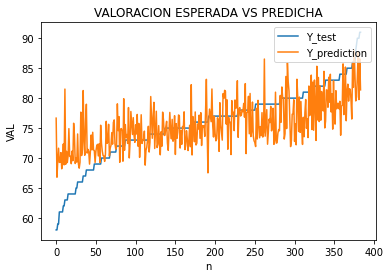

In [24]:
l = []
l1 =list(Y_test)
l2 = list(Y_prediction)
l1new = []
l2new = []
for i in range(len(Y_test)):
    l.append([l1[i],l2[i]])
while len(l) != 0:
    c = 0
    min = l[0][0]
    for i in range(len(l)):
        if l[i][0] < min:
            min = l[i][0]
            c = i
    l1new.append(l[c][0])
    l2new.append(l[c][1])
    l.pop(c)
n = list(range(len(Y_test)))
fig, ax = plt.subplots()

ax.plot(n, l1new, label = "Y_test")
#ax.plot(n, n1, label = "n^2 - 1")
ax.plot(n, l2new, label = "Y_prediction")
#ax.plot(n, n2, label = "3^(n^2)")
ax.legend(loc = 'upper right')
ax.set_xlabel("n")
ax.set_ylabel("VAL")
ax.set_title("VALORACION ESPERADA VS PREDICHA")
plt.savefig('VALORACION ESPERADA VS PREDICHA.png')

3.580346458828189

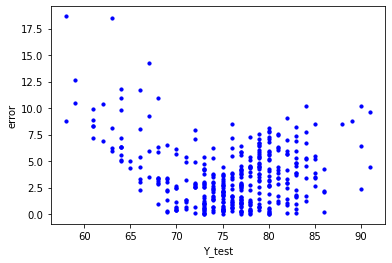

In [25]:
#error según la valoracion
df_er = pd.DataFrame([Y_test_1, Y_prediction], index = None)
df_er.index = ['Y_test', 'Y_prediction']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['Y_prediction'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )
df_er['error'].mean()

In [26]:
df_er['error'].mean()

3.580346458828189

In [27]:
lin_reg.coef_


array([ 1.66329447,  2.53085877, -0.46488853,  0.23765607,  0.78889726,
        0.2732346 , -0.72576539,  0.04465823,  0.72572326, -0.93558106,
       -0.72781374,  4.72005842,  0.43179225, -0.04879444,  0.02716816,
       -3.27630586,  0.28546661,  0.06698806,  0.05066018,  0.09061963,
        0.48459988, -0.12121299])

C:\Users\irait\AppData\Local\Temp\ipykernel_21684\2896417037.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


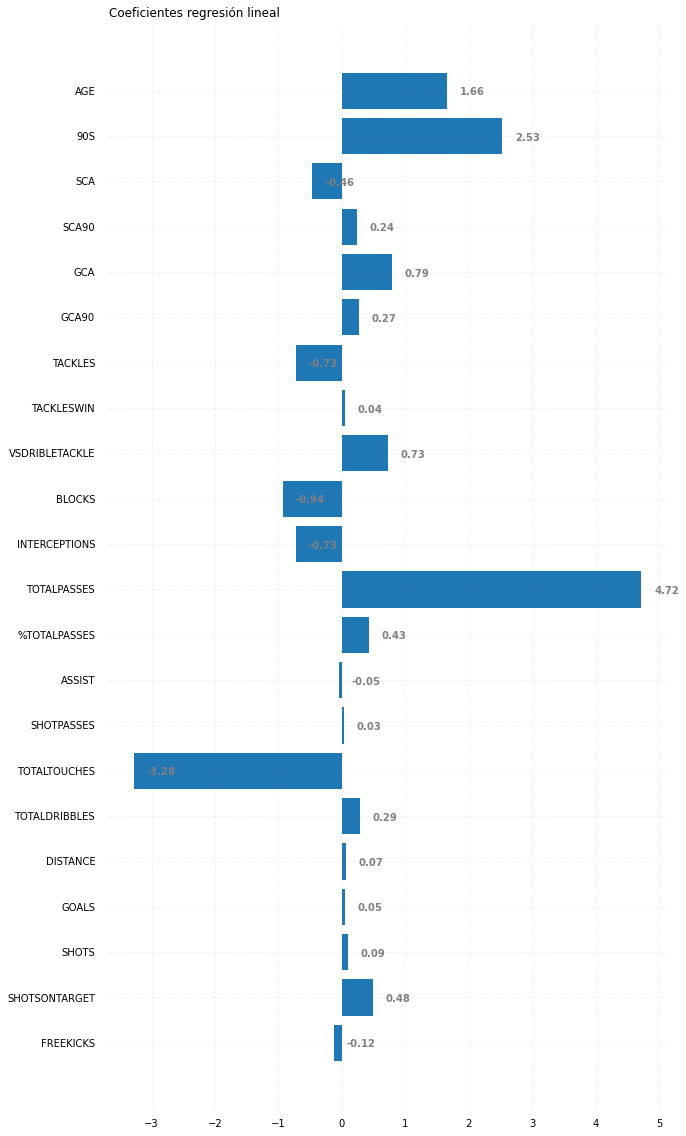

In [28]:
# Figure Size
fig, ax = plt.subplots(figsize =(10, 20))
plt.barh(df.columns[0:22] , lin_reg.coef_)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Coeficientes regresión lineal',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, '', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

<AxesSubplot:xlabel='SCA', ylabel='VAL'>

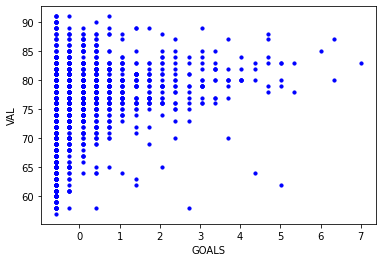

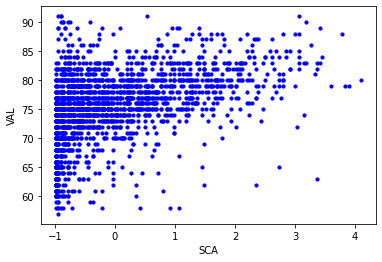

In [29]:
#Veamos si tiene algun sentido. veamos la relacion entre EDAD y VAL
df.plot.scatter(x = 'GOALS', y = 'VAL', s = 10, c = 'blue')
df.plot.scatter(x = 'SCA', y = 'VAL', s = 10, c = 'blue')


In [30]:
##########################################################################
######## REGRESION LINEAL CON VAL > 70 ##########
###########################################################################

In [31]:
#Veamos si quedandonos con datos por encima de 70 se arregla la cosa
df1 = df[df['VAL']> 69]

In [32]:
#Quitamos jugadores con datos NaN
df1 = df1.dropna()

X_train, X_test = train_test_split(df1, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train = Y_train.values
Y_test = Y_test.values
X_train = X_train.values
X_test = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

<AxesSubplot:xlabel='Y_test', ylabel='error'>

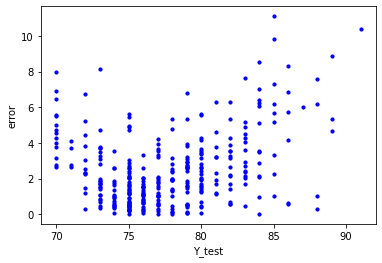

In [33]:
#error según la valoracion
df_er = pd.DataFrame([Y_test, lin_reg.predict(X_test)], index = None)
df_er.index = ['Y_test', 'yhat_test']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['yhat_test'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [34]:
df_er['error'].mean()

2.499523925522111

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (22,) and arg 3 with shape (16,).

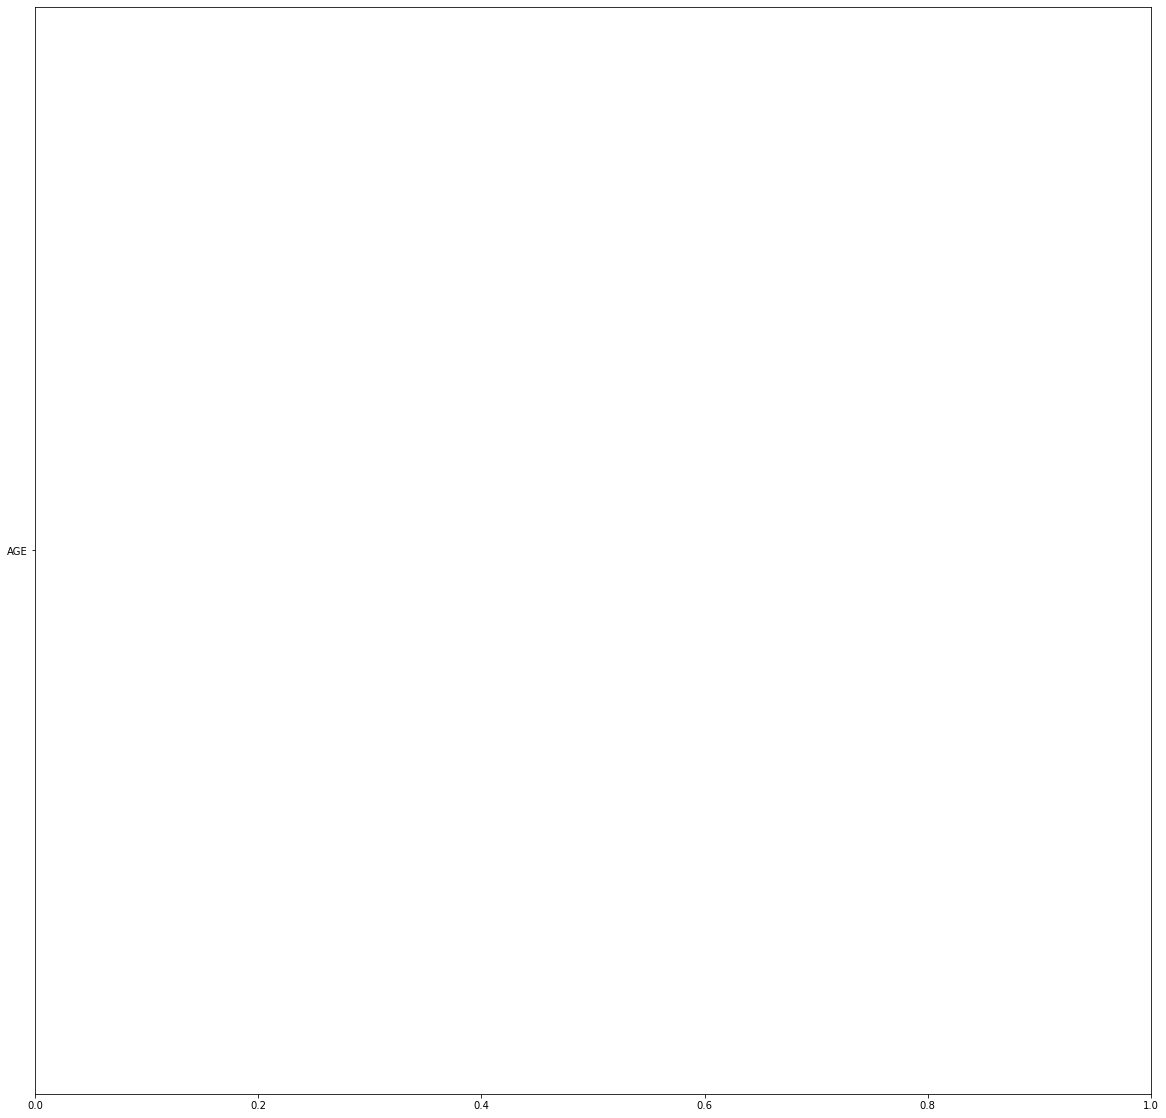

In [35]:
# Figure Size
fig, ax = plt.subplots(figsize =(20, 20))
plt.barh(df1.columns[0:16] , lin_reg.coef_)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Sports car and their price in crore',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [36]:
##########################################################################
######## REGRESION LINEAL CON JUGADORES QUE JUEGAN MINUTOS ##########
###########################################################################

In [37]:
df['90S'].quantile([0.25,0.5,0.75])
df2 = df[df['90S']> -0.929796] #-0.929796 es el primer cuantil

In [38]:
#Quitamos jugadores con datos NaN
df2 = df2.dropna()

X_train, X_test = train_test_split(df2, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train = Y_train.values
Y_test = Y_test.values
X_train = X_train.values
X_test = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (22,) and arg 3 with shape (16,).

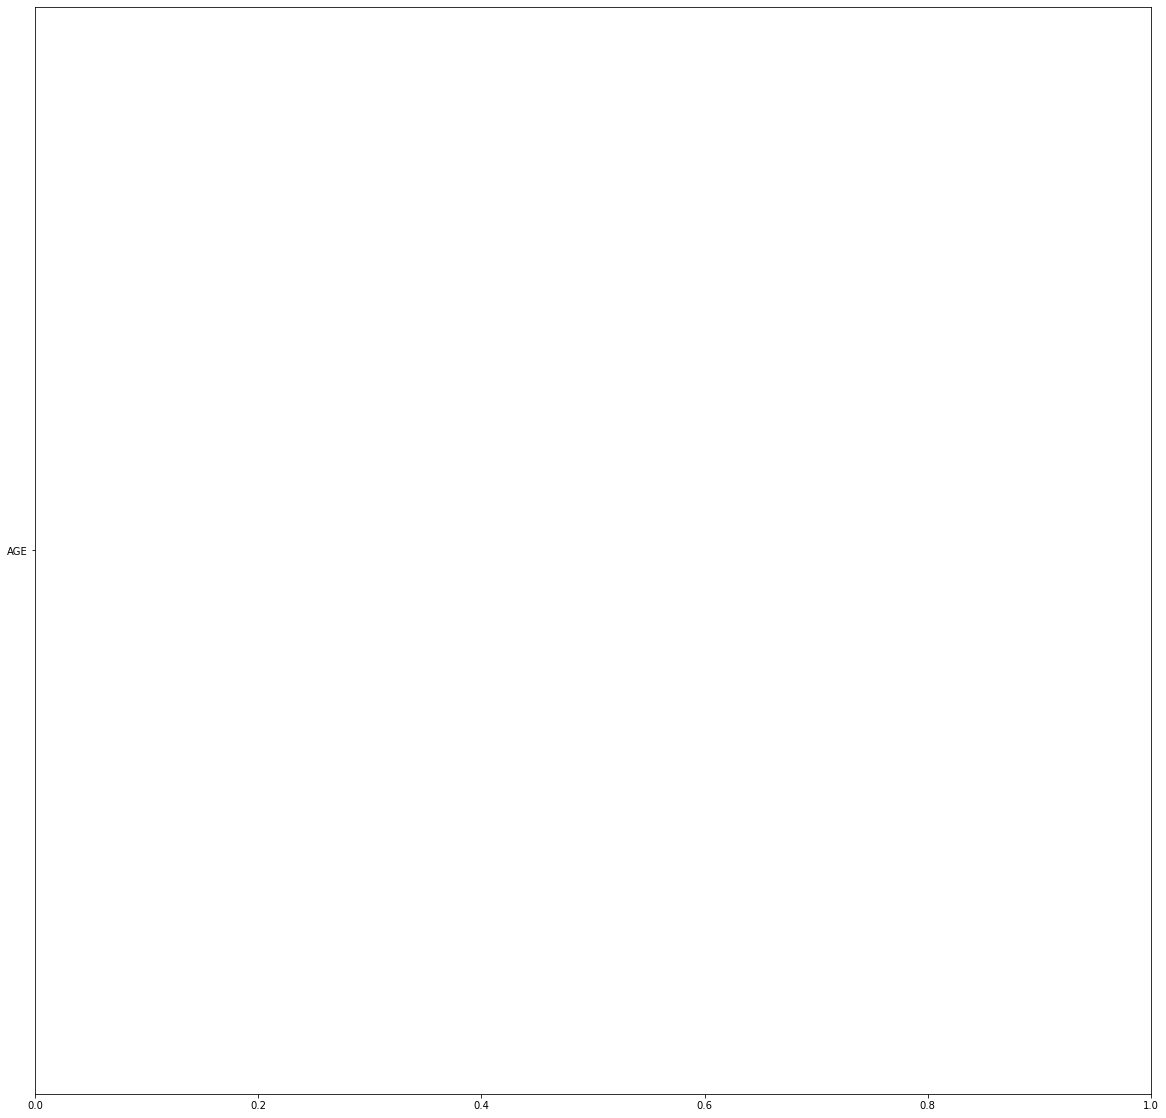

In [39]:
# Figure Size
fig, ax = plt.subplots(figsize =(20, 20))
plt.barh(df2.columns[0:16] , lin_reg.coef_)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Sports car and their price in crore',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

<AxesSubplot:xlabel='Y_test', ylabel='error'>

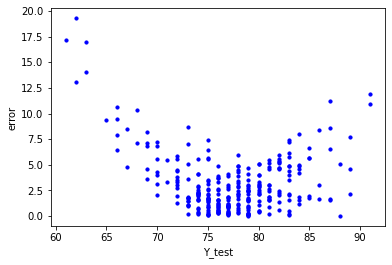

In [40]:
#error según la valoracion
df_er = pd.DataFrame([Y_test, lin_reg.predict(X_test)], index = None)
df_er.index = ['Y_test', 'yhat_test']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['yhat_test'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [41]:
df_er['error'].mean()

3.192591630192532

In [42]:
##########################################################################
######## REGRESION LINEAL CON VAL > 69 Y 90S > 6 #########################
##########################################################################

In [43]:
#Combinacion de las anteriores
df3 = df[df['90S']> -0.929796] #-0.929796 es el primer cuantil
df3 = df3[df3['VAL']>69]

In [44]:
#Quitamos jugadores con datos NaN
df3 = df3.dropna()

X_train, X_test = train_test_split(df3, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train = Y_train.values
Y_test = Y_test.values
X_train = X_train.values
X_test = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (22,) and arg 3 with shape (16,).

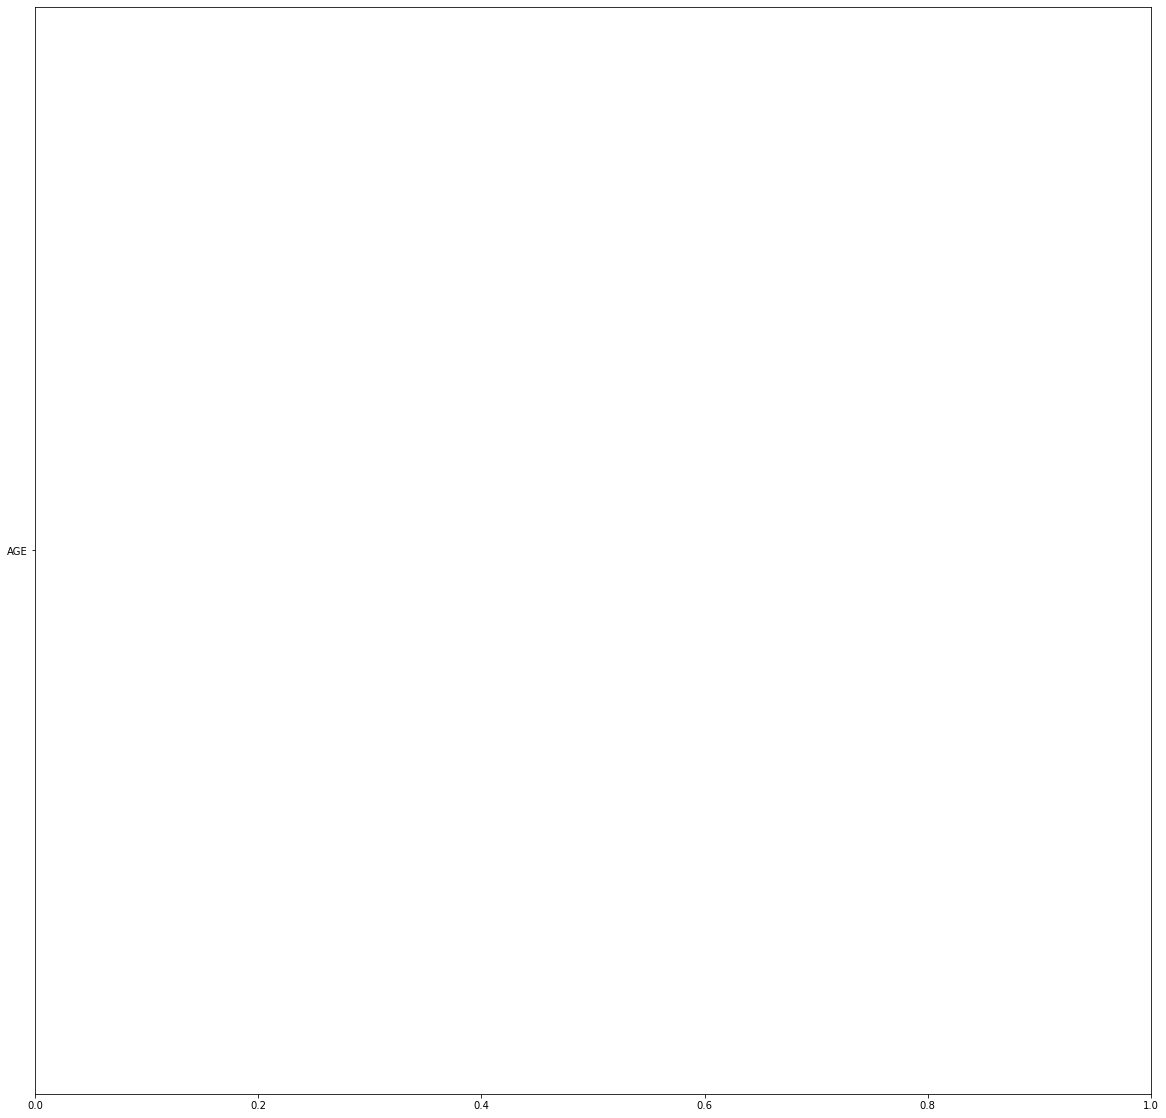

In [45]:
# Figure Size
fig, ax = plt.subplots(figsize =(20, 20))
plt.barh(df3.columns[0:16] , lin_reg.coef_)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Sports car and their price in crore',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

<AxesSubplot:xlabel='Y_test', ylabel='error'>

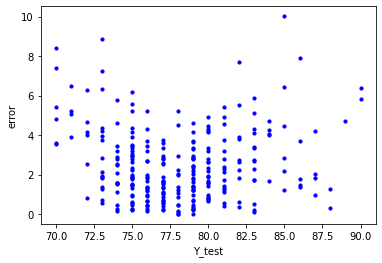

In [46]:
#error según la valoracion
df_er = pd.DataFrame([Y_test, lin_reg.predict(X_test)], index = None)
df_er.index = ['Y_test', 'yhat_test']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['yhat_test'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [47]:
df_er['error'].mean()

2.4885313808244076

In [48]:
#################################################
############ REGRESION POLINOMIAL ###############
#################################################

In [49]:
from sklearn.preprocessing import PolynomialFeatures as PF
poly_features = PF(degree =2, include_bias = False)
X = df3.drop(['VAL'],axis = 1)
X_poly = poly_features.fit_transform(X)
lista = []
for i in range(X_poly.shape[1]):
    lista.append('X' + str(i+1))
X_poly = pd.DataFrame(X_poly,columns = lista)
X_poly['VAL'] = list(df3['VAL'])

In [50]:
#Quitamos jugadores con datos NaN


X_train, X_test = train_test_split(X_poly, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train_1 = Y_train.values
Y_test_1 = Y_test.values
X_train_1 = X_train.values
X_test_1 = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

<AxesSubplot:xlabel='Y_test', ylabel='error'>

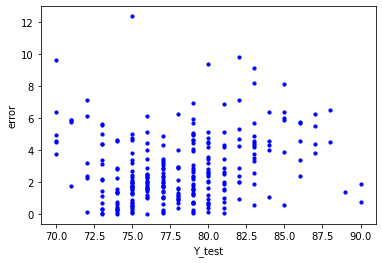

In [51]:
#error según la valoracion
df_er = pd.DataFrame([Y_test_1, Y_prediction], index = None)
df_er.index = ['Y_test', 'Y_prediction']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['Y_prediction'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [52]:
df_er['error'].mean()

2.8067288076212336

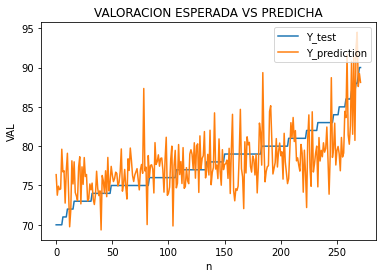

In [53]:
l = []
l1 =list(Y_test)
l2 = list(Y_prediction)
l1new = []
l2new = []
for i in range(len(Y_test)):
    l.append([l1[i],l2[i]])
while len(l) != 0:
    c = 0
    min = l[0][0]
    for i in range(len(l)):
        if l[i][0] < min:
            min = l[i][0]
            c = i
    l1new.append(l[c][0])
    l2new.append(l[c][1])
    l.pop(c)
n = list(range(len(Y_test)))
fig, ax = plt.subplots()

ax.plot(n, l1new, label = "Y_test")
#ax.plot(n, n1, label = "n^2 - 1")
ax.plot(n, l2new, label = "Y_prediction")
#ax.plot(n, n2, label = "3^(n^2)")
ax.legend(loc = 'upper right')
ax.set_xlabel("n")
ax.set_ylabel("VAL")
ax.set_title("VALORACION ESPERADA VS PREDICHA")
plt.savefig('VALORACION ESPERADA VS PREDICHA.png')

In [54]:
from sklearn.preprocessing import PolynomialFeatures as PF
poly_features = PF(degree =2, include_bias = False)
X = df.drop(['VAL'],axis = 1)
X_poly = poly_features.fit_transform(X)
lista = []
for i in range(X_poly.shape[1]):
    lista.append('X' + str(i+1))
X_poly = pd.DataFrame(X_poly,columns = lista)
X_poly['VAL'] = list(df['VAL'])

In [55]:
#Quitamos jugadores con datos NaN


X_train, X_test = train_test_split(X_poly, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train_1 = Y_train.values
Y_test_1 = Y_test.values
X_train_1 = X_train.values
X_test_1 = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

<AxesSubplot:xlabel='VAL', ylabel='Error'>

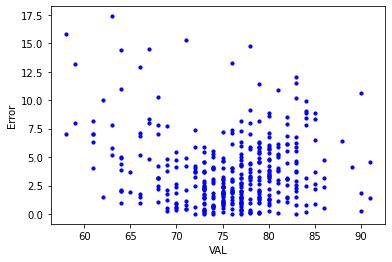

In [61]:
#error según la valoracion
df_er = pd.DataFrame([Y_test_1, Y_prediction], index = None)
df_er.index = ['Y_test', 'Y_prediction']
df_er = df_er.transpose()
df_er['Error'] = abs(df_er['Y_test'] - df_er['Y_prediction'])
df_er.plot.scatter(x = 'Y_test', y = 'Error', s = 10, c = 'blue' )

In [57]:
df_er['error'].mean()

3.6994590266187832

In [ ]:
l = []
l1 =list(Y_test)
l2 = list(Y_prediction)
l1new = []
l2new = []
for i in range(len(Y_test)):
    l.append([l1[i],l2[i]])
while len(l) != 0:
    c = 0
    min = l[0][0]
    for i in range(len(l)):
        if l[i][0] < min:
            min = l[i][0]
            c = i
    l1new.append(l[c][0])
    l2new.append(l[c][1])
    l.pop(c)
n = list(range(len(Y_test)))
fig, ax = plt.subplots()

ax.plot(n, l1new, label = "Y_test")
#ax.plot(n, n1, label = "n^2 - 1")
ax.plot(n, l2new, label = "Y_prediction")
#ax.plot(n, n2, label = "3^(n^2)")
ax.legend(loc = 'upper right')
ax.set_xlabel("n")
ax.set_ylabel("VAL")
ax.set_title("VALORACION ESPERADA VS PREDICHA")
plt.savefig('VALORACION ESPERADA VS PREDICHA.png')

In [ ]:
#################################################
############ REGRESION LOGISTICA ###############
#################################################

In [ ]:
lista = []
for i in range(len(df3['VAL'])):
    if list(df3['VAL'])[i] < df3['VAL'].mean():
        lista.append(0)
    else:
        lista.append(1)
df3['LOGI'] = lista

In [ ]:
#Quitamos jugadores con datos NaN


X_train, X_test = train_test_split(df3, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train_1 = Y_train.values
Y_test_1 = Y_test.values
X_train_1 = X_train.values
X_test_1 = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
Y = X_train['LOGI']
X = X_train.drop(['LOGI'], axis = 1)
log_reg.fit(X,Y)

In [ ]:
X_test.head()

In [ ]:
######### PASO DE 0-1 A VALORACIONES ###############
X_test1 = X_test.drop(['LOGI'], axis = 1)
y_proba = log_reg.predict_proba(X_test1)
val_pred = []
for i in range(len(y_proba)):
    for j in range(22):
        if y_proba[i][1] < (j+1)/22:
            val_pred.append(70 + j)
            break
            

In [ ]:
#error según la valoracion
df_er = pd.DataFrame([list(Y_test), val_pred], index = None)
df_er.index = ['Y_test', 'yhat_test']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['yhat_test'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [ ]:
df_er['error'].mean()

In [ ]:
l = []
l1 =list(Y_test)
l2 = list(val_pred)
l1new = []
l2new = []
for i in range(len(Y_test)):
    l.append([l1[i],l2[i]])
while len(l) != 0:
    c = 0
    min = l[0][0]
    for i in range(len(l)):
        if l[i][0] < min:
            min = l[i][0]
            c = i
    l1new.append(l[c][0])
    l2new.append(l[c][1])
    l.pop(c)
n = list(range(len(Y_test)))
fig, ax = plt.subplots()

ax.plot(n, l1new, label = "Y_test")
#ax.plot(n, n1, label = "n^2 - 1")
ax.plot(n, l2new, label = "Y_prediction")
#ax.plot(n, n2, label = "3^(n^2)")
ax.legend(loc = 'upper right')
ax.set_xlabel("n")
ax.set_ylabel("VAL")
ax.set_title("VALORACION ESPERADA VS PREDICHA")
plt.savefig('VALORACION ESPERADA VS PREDICHA.png')

In [ ]:
lista = []
for i in range(len(df['VAL'])):
    if list(df['VAL'])[i] < df['VAL'].mean():
        lista.append(0)
    else:
        lista.append(1)
df['LOGI'] = lista

In [ ]:
#Quitamos jugadores con datos NaN


X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train_1 = Y_train.values
Y_test_1 = Y_test.values
X_train_1 = X_train.values
X_test_1 = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
Y = X_train['LOGI']
X = X_train.drop(['LOGI'], axis = 1)
log_reg.fit(X,Y)

In [ ]:
X_test.head()

In [ ]:
######### PASO DE 0-1 A VALORACIONES ###############
X_test1 = X_test.drop(['LOGI'], axis = 1)
y_proba = log_reg.predict_proba(X_test1)
val_pred = []
for i in range(len(y_proba)):
    for j in range(22):
        if y_proba[i][1] < (j+1)/22:
            val_pred.append(70 + j)
            break
            

In [ ]:
#error según la valoracion
df_er = pd.DataFrame([list(Y_test), val_pred], index = None)
df_er.index = ['Y_test', 'yhat_test']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['yhat_test'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [ ]:
df_er['error'].mean()

In [ ]:
l = []
l1 =list(Y_test)
l2 = list(val_pred)
l1new = []
l2new = []
for i in range(len(Y_test)):
    l.append([l1[i],l2[i]])
while len(l) != 0:
    c = 0
    min = l[0][0]
    for i in range(len(l)):
        if l[i][0] < min:
            min = l[i][0]
            c = i
    l1new.append(l[c][0])
    l2new.append(l[c][1])
    l.pop(c)
n = list(range(len(Y_test)))
fig, ax = plt.subplots()

ax.plot(n, l1new, label = "Y_test")
#ax.plot(n, n1, label = "n^2 - 1")
ax.plot(n, l2new, label = "Y_prediction")
#ax.plot(n, n2, label = "3^(n^2)")
ax.legend(loc = 'upper right')
ax.set_xlabel("n")
ax.set_ylabel("VAL")
ax.set_title("VALORACION ESPERADA VS PREDICHA")
plt.savefig('VALORACION ESPERADA VS PREDICHA.png')

In [ ]:
#################################################
######### COMBINACION REGRESIONES LINEALES ######
#################################################

In [ ]:
lin_reg = LinearRegression()

In [ ]:
columnas = df.columns[:-1]
predicciones = []
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)
Y_train = X_train['VAL']
Y_test = X_test['VAL']

for col in columnas:
    X_trainx = X_train[col]
    X_testx = X_test[col]
    Y_train_1 = Y_train.values
    Y_test_1 = Y_test.values
    X_train_1 = X_trainx.values
    X_train_1 = X_train_1.reshape(-1,1)
    X_test_1 = X_testx.values
    X_test_1 = X_test_1.reshape(-1,1)
    lin_reg.fit(X_train_1,Y_train_1) #hago la regresion
    Y_prediction = lin_reg.predict(X_train_1)#predigo
    predicciones.append(Y_prediction)


In [ ]:
data = {}
for i in range(len(columnas)):
   data[columnas[i]] = predicciones[i]
data['VAL'] = Y_train
df_new = pd.DataFrame(data)

In [ ]:
X_train, X_test = train_test_split(df_new, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train_1 = Y_train.values
Y_test_1 = Y_test.values
X_train_1 = X_train.values
X_test_1 = X_test.values
lin_reg.fit(X_train_1,Y_train_1) #hago la regresion
Y_prediction = lin_reg.predict(X_test_1)#predigo

In [ ]:
len(Y_prediction)

In [ ]:
#error según la valoracion
df_er = pd.DataFrame([Y_test, Y_prediction], index = None)
df_er.index = ['Y_test', 'yhat_test']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['yhat_test'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [ ]:
df_er['error'].mean()

In [ ]:
####################################
#############RNA###################

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df11 = pd.DataFrame(housing.data)
df12 = pd.DataFrame(housing.target)
df12.head()

In [ ]:
X = df.drop(['VAL'], axis = 1)
Y = df['VAL']
from sklearn.preprocessing import StandardScaler
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, Y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
X.head()

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X_test[1]

In [ ]:
#pg 308
'''model = keras.models.Sequential([keras.layers.Dense(16, activation = 'relu'), keras.layers.Dense(1)])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_valid, Y_valid))
mse_test = model.evaluate(X_test, Y_test)
X_new = X_test[:3]
Y_pred = model.predict(X_new)'''

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(12, input_dim=16, kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, Y_train, epochs=200, validation_data = (X_valid, Y_valid))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
ynew= model.predict(X_test)
Y_test = list(Y_test)
for i in range(40):
    print (float(Y_test[i])-ynew[i].item())

In [ ]:
len(X_test)

In [ ]:
c = 0
for i in range(len(X_test)):
   c += (float(Y_test[i]) - ynew[i].item())**2
c = c/376
print(c**(1/2))

In [ ]:
X.info()